**Author :** Vaibhav Thakur

**Steps involved in PCA**<br>
- Step 1: Center the dataset<br>
- Step 2: Calculate the covariance matrix of the centered data<br>
- Step 3: Compute the eigenvectors and eigenvalues<br>
- Step 4: Sort the eigenvalues in descending order and choose the top k eigen vectors corresponding to the highest eigenvalues<br>
- Step 5: Transform the original data by multiplying it with the selected eigenvectors(Principal Components) to obtain a lower-dimensional representation

In [17]:
import numpy as np
import matplotlib.pyplot as plt

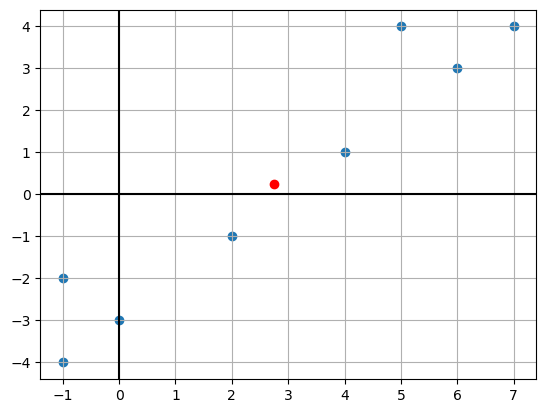

(2, 8)
[[ 4  5  6  7  2 -1  0 -1]
 [ 1  4  3  4 -1 -2 -3 -4]]


In [18]:
# Dataset

X = np.array([(4,1),(5,4),(6,3),(7,4),(2,-1),(-1,-2),(0,-3),(-1,-4)]).T

# Visualizing Dataset

plt.scatter(X[0,:], X[1,:])
plt.axhline(0, color='k')
plt.axvline(0, color='k')

x_mean = X.mean(axis=1)

plt.scatter(x_mean[0], x_mean[1], color = 'r')
plt.grid()
plt.show()

print(X.shape)
print(X)


In [19]:
# Center the dataset

def center(X):
    return X-X.mean(axis=1).reshape(2,1) 

d, n = X.shape # Here X.shape = (2,8), so d=2 and n=8
X_centered = center(X)

print(X_centered)

[[ 1.25  2.25  3.25  4.25 -0.75 -3.75 -2.75 -3.75]
 [ 0.75  3.75  2.75  3.75 -1.25 -2.25 -3.25 -4.25]]


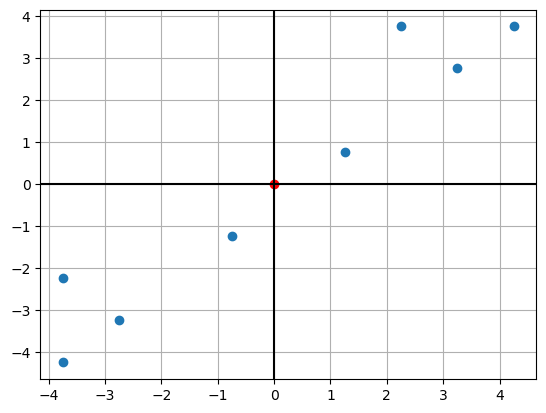

In [20]:
# Visualizing centered dataset

plt.scatter(X_centered[0,:], X_centered[1,:])
plt.axhline(0, color = 'k')
plt.axvline(0, color= 'k')

c_mean = X_centered.mean(axis = 1)

plt.scatter(c_mean[0], c_mean[1], color = 'r')
plt.grid()
plt.show()


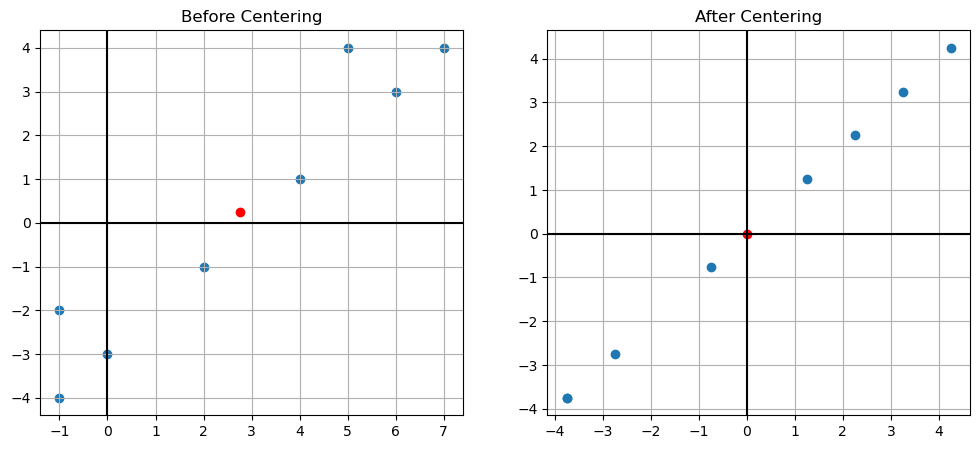

In [21]:
# Compare the two graphs

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.scatter(X[0,:],X[1,:])
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')

x_mean = X.mean(axis = 1)

plt.scatter(x_mean[0], x_mean[1], color = 'r')
plt.grid()
plt.title('Before Centering')

plt.subplot(1,2,2)
plt.scatter(X_centered[0,:], X_centered[0,:])
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')

c_mean = X_centered.mean(axis = 1)

plt.scatter(c_mean[0], c_mean[1], color = 'r')
plt.grid()
plt.title('After Centering')

plt.show()

In [22]:
# Covariance matrix

def covariance(X):
    return X@X.T / X.shape[1]

C = covariance(X_centered)
d = C.shape[0]
print(C)

[[8.9375 8.5625]
 [8.5625 8.9375]]


In [34]:
# Computing the Principal Components(PCs)

# We are taking two principal components at first

def compute_pc(C) :
    d = C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1, w_2 = eigvec[:,-1], eigvec[:,-2]
    return w_1, w_2

w_1, w_2 = compute_pc(C)

w_1 = w_1.reshape(w_1.shape[0],1)
w_2 = w_2.reshape(w_2.shape[0],1)

print(w_1)
print(w_2)

[[0.70710678]
 [0.70710678]]
[[-0.70710678]
 [ 0.70710678]]


In [35]:
# Reconstruction using the two  PCs

# Since the points are two dimensional, by combining the projection on the two PC's, we get back the centered dataset
w_1 @ (X_centered.T @ w_1).reshape(1,n) + w_2 @ (X_centered.T @  w_2).reshape(1,n)



array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

In [36]:
# The reconstruction error by the first PC is given by
p_1 = X_centered[:,0]

# Let the reconstruction of the first point using first PC is given by
p_2 = w_1 @ (p_1 @ w_1)
print('The reconstruction error with the first PC is', str(np.sum(np.square(p_1 - p_2) ) ) )



The reconstruction error with the first PC is 0.125


In [37]:
# Total reconstruction error for each point when considering the first principal component

rec_error_1 = np.square(
    np.linalg.norm(
        X_centered[:,] - (w_1@(X_centered.T @ w_1).reshape(1,n))[:,], axis = 0
                         )
    )
print(rec_error_1)

[0.125 1.125 0.125 0.125 0.125 1.125 0.125 0.125]


In [38]:
# Total reconstruction error when considering first principal component

print('Total reconstruction error along the first principal component is', str(np.round((rec_error_1).mean(),4)))


Total reconstruction error along the first principal component is 0.375


**The reconstruction error for the entire dataset along w_r will be**

In [39]:
w_r = np.array([0,1]).reshape(-1,1)

# Reconstruction error for each point when considering the vector w_r
rec_error_r = np.square(np.linalg.norm(X_centered[:,] - (w_r @ (X_centered.T @ w_r).reshape(1,n))[:,], axis=0))
print(rec_error_r)

print("The reconstruction error along w_r is ",str((rec_error_r).mean()))

[ 1.5625  5.0625 10.5625 18.0625  0.5625 14.0625  7.5625 14.0625]
The reconstruction error along w_r is  8.9375


**Finding the optimal value of K**

In [40]:
# Sort the eigenvalues in descending order
eigval, eigvec = np.linalg.eigh(C)
eigval = eigval[::-1]

In [41]:
def var_thresh(k):
    tot_var = 0
    req_var = 0
    for x in eigval:
        tot_var += x
    for y in range(k):
        req_var += eigval[y]

    return (req_var/tot_var)

for i in range(d+1):
    print('The explained variance when K is', str(i), 'is', str(np.round(var_thresh(i),4)))

The explained variance when K is 0 is 0.0
The explained variance when K is 1 is 0.979
The explained variance when K is 2 is 1.0


# PCA on a real-world Dataset


**DATASET GENERATION**

In [42]:
from keras.datasets import mnist

# keras is a deep learning library
# mnist is built-in dataset of handwritten digits
# Each image is 28x28 pixels

# Load the dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()



**This loads four objects**
- X_train : Training images
- y_train : Training labels
- X_test : Test images
- y_test : Test labels

In [43]:
# Let's check their shapes 
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of X_test (10000, 28, 28)
Shape of y_test (10000,)


**we get**
- 60,000 training images
- 10,000 test images
- Each image is 28 x 28 pixels

In [44]:
# Selecting only digit '2' from the training data

X = X_train[y_train == 2]
X.shape

(5958, 28, 28)

**What does y_train == 2 mean?** <br>


y_train is something like [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, ...<br>

y_train == 2 creates a boolean mask : <br>
[False, False, False, False, False, True, ...<br>

So, we only keep images whose label is 2
There are 5958 handwritten 2's in MNIST


In [45]:
# Take only the first 100 images
X = X_train[y_train == 2][:100]
X.shape

(100, 28, 28)

In [46]:
# Flatten each image into a vector
X = X.reshape(-1, 28*28)

X.shape

(100, 784)

**Why flatten?**
- Machine Learning algorithms usually work with vectors, not images
- A 28*28 image = 784 pixels
- Each image becomes a vector of length 784

Each row = one image <br>
Each column = one pixel position<br>

We will choose one test image with label '2'. Here we are choosing the first image of '2' as test image (image with index 0)

In [47]:
# To do all this in one step
X = X_train[y_train ==2][: 100].reshape(-1,28*28).T
test_image = X_test[y_test == 2][0].reshape(28*28)

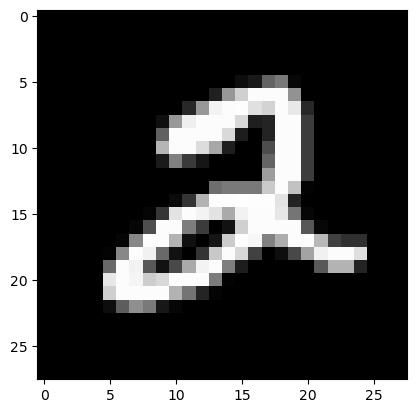

In [48]:
# Observe the first image in the dataset
img = X[:,0].reshape(28,28)
plt.imshow(img, cmap = 'gray');

In [49]:
def center(X):
    return X-X.mean(axis = 1).reshape(-1,1)

d,n = X.shape
X_prime = center(X)

def covariance(X):
    return X@X.T / X.shape[1]

C  = covariance(X_prime)

**Compute the first and second principal components of the dataset w1 and w2**

In [50]:
def compute_pc(C):
    d = C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1, w_2 = eigvec[:,-1], eigvec[:,-2]
    return w_1, w_2

w_1, w_2 = compute_pc(C)

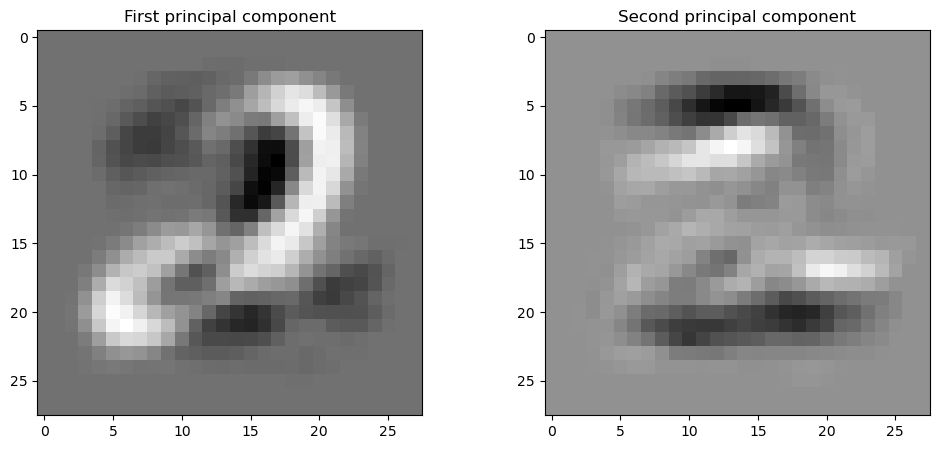

In [51]:
# Visualize the first and second principal components as images

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)

w_1_image = w_1.reshape(28,28)

plt.imshow(w_1_image, cmap = 'gray')
plt.title('First principal component')

plt.subplot(1,2,2)

w_2_image = w_2.reshape(28,28)

plt.imshow(w_2_image, cmap = 'gray')
plt.title('Second principal component')
plt.show();

Given a test_image, visualize the proxies by reconstructing it using the top k-principal components. Consider four values of k; values of k for which the top-k principal components explain:<br>
- 20% of the variance<br>
- 50% of the variance<br>
- 80% of the variance<br>
- 95% of the variance

Text(0.5, 1.0, 'Test Image')

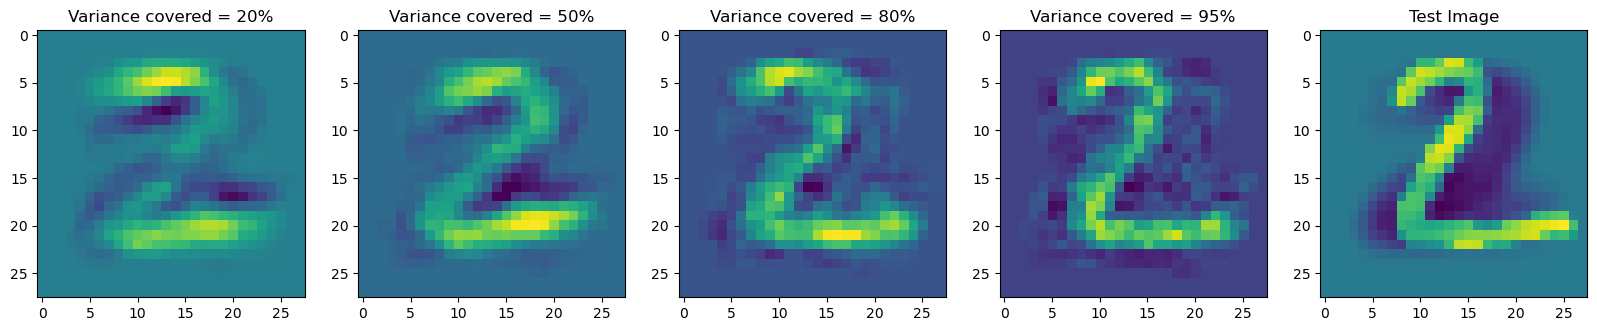

In [52]:
def reconstruct(C, test_image, thresh):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list(reversed(eigval))
    tot = sum(eigval)
    K = len(eigval)
    for k in range(len(eigval)):
        if sum(eigval[: k + 1]) / tot >= thresh:
            K = k + 1
            break
    W = eigvec[:, -K: ]
    coeff = test_image @ W
    return W @ coeff

plt.figure(figsize=(20,20))
# 0.20
recon_image = reconstruct(C, test_image, 0.20)
plt.subplot(1, 5, 1)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 20%")
# 0.5
recon_image = reconstruct(C, test_image, 0.50)
plt.subplot(1, 5, 2)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 50%")
# 0.80
recon_image = reconstruct(C, test_image, 0.80)
plt.subplot(1, 5, 3)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 80%")
# 0.95
plt.subplot(1, 5, 4)
recon_image = reconstruct(C, test_image, 0.95)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 95%")
# Original mean subtracted image
test_image = np.float64(test_image) - X.mean(axis = 1)
plt.subplot(1, 5, 5)
plt.imshow(test_image.reshape(28, 28))
plt.title("Test Image")